In [1]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.axes_grid1 import make_axes_locatable
import utils as u


In [2]:
figdir = u.get_figdir("summary", subdir="rotativity")

In [3]:
lim = 20
wz = np.arange(-lim, lim + 0.5, 0.5)
vx = np.arange(-lim, lim + 0.5, 0.5)
B = 0.5

data = list(itertools.product(vx, wz))
df = pd.DataFrame(data, columns=["vx", "wz"])


In [4]:
df["vR"] = df.vx + B / 2 * df.wz
df["vL"] = df.vx - B / 2 * df.wz

df["rho"] = (B * df.wz).abs() / (df.vR.abs() + df.vL.abs())
df["vz"] = B / 2 * df.wz

df["lin"] = 1 - df.rho


df["averho"] = (B * df.wz).abs() / (df.vx.abs() + B * df.wz.abs())

In [5]:
lim = 20
vL = np.arange(-lim, lim + 0.5, 0.5)
vR = np.arange(-lim, lim + 0.5, 0.5)
B = 0.5

data = list(itertools.product(vL, vR))
wdf = pd.DataFrame(data, columns=["vL", "vR"])
wdf["dV"] = (wdf.vR - wdf.vL).abs()
wdf["vX"] = (wdf.vR + wdf.vL).abs() / 2
wdf["rho1"] = wdf.dV / (wdf.vR.abs() + wdf.vL.abs())
wdf["rho2"] = wdf.dV / (wdf.dV + wdf.vX.abs())

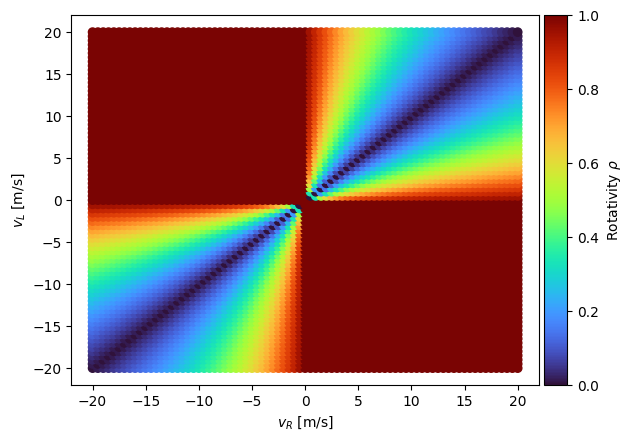

In [6]:
fig, ax = plt.subplots()
sc = ax.scatter(wdf.vR, wdf.vL, c=wdf.rho1, cmap="turbo")
ax.set_ylabel(r"${v}_{L}$ [m/s]")
ax.set_xlabel(r"${v}_{R}$ [m/s]")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = fig.colorbar(sc, cax=cax, orientation="vertical")
cb.set_label(r"Rotativity $\rho$")

for ext in u.EXTS:
    fig.savefig(figdir / f"rho_naive.{ext}", bbox_inches="tight")


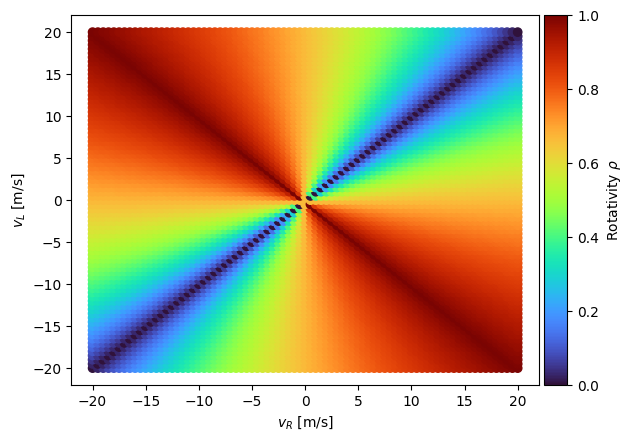

In [7]:
fig, ax = plt.subplots()
sc = ax.scatter(wdf.vR, wdf.vL, c=wdf.rho2, cmap="turbo")
ax.set_ylabel(r"${v}_{L}$ [m/s]")
ax.set_xlabel(r"${v}_{R}$ [m/s]")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = fig.colorbar(sc, cax=cax, orientation="vertical")
cb.set_label(r"Rotativity $\rho$")

for ext in u.EXTS:
    fig.savefig(figdir / f"rho.{ext}", bbox_inches="tight")

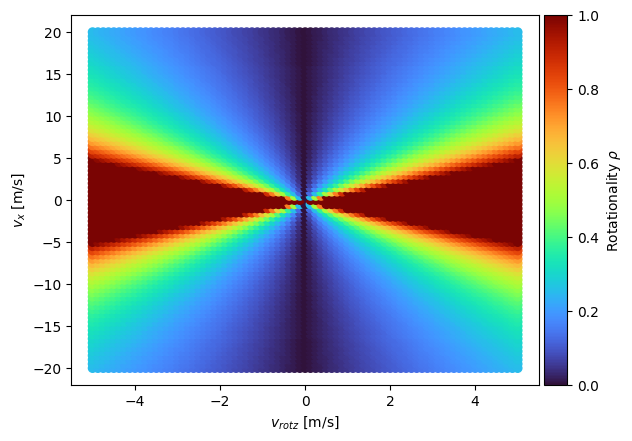

In [8]:
fig, ax = plt.subplots()
sc = ax.scatter(df.vz, df.vx, c=df.rho, cmap="turbo")
ax.set_xlabel(r"${{v}_{rot}}_{z}$ [m/s]")
ax.set_ylabel("$v_x$ [m/s]")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = fig.colorbar(sc, cax=cax, orientation="vertical")
cb.set_label(r"Rotationality $\rho$")

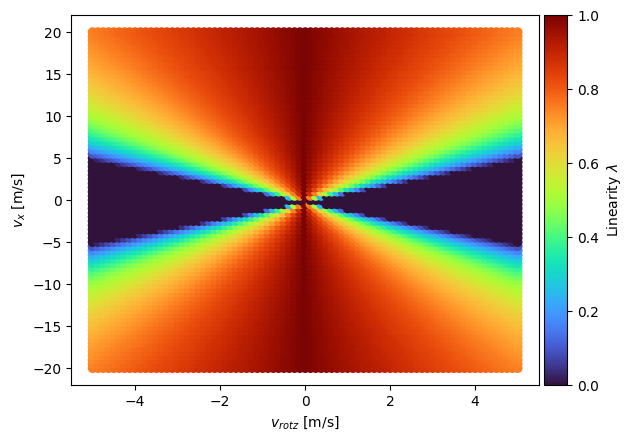

In [9]:
fig, ax = plt.subplots()
sc = ax.scatter(df.vz, df.vx, c=df.lin, cmap="turbo")
ax.set_xlabel(r"${{v}_{rot}}_{z}$ [m/s]")
ax.set_ylabel("$v_x$ [m/s]")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = fig.colorbar(sc, cax=cax, orientation="vertical")
cb.set_label(r"Linearity $\lambda$")

In [10]:
fig, ax = plt.subplots()
sc = ax.scatter(df.vz, df.vx, c=df.averho, cmap="turbo")
ax.set_xlabel(r"${{v}_{rot}}_{z}$ [m/s]")
ax.set_ylabel("$v_x$ [m/s]")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = fig.colorbar(sc, cax=cax, orientation="vertical")
cb.set_label(r"Rotationality $\rho$")

In [11]:
df["ICRy"] = df.vx / df.wz

df["ICRyL"] = (df.vx - df.vL) / df.wz
df["ICRyR"] = (df.vx - df.vR) / df.wz

df["Bs"] = df.ICRyL - df.ICRyR

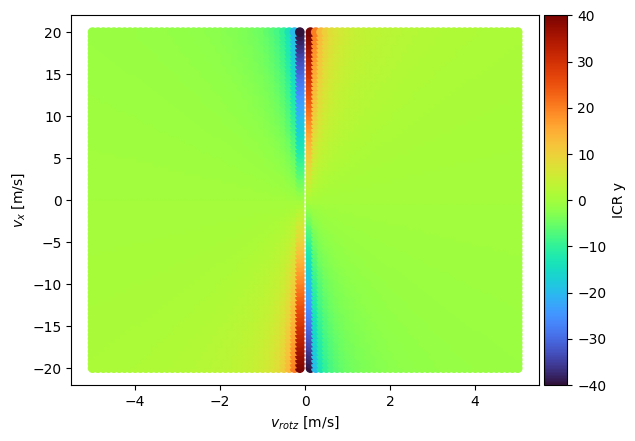

In [12]:
fig, ax = plt.subplots()
sc = ax.scatter(df.vz, df.vx, c=df.ICRy, cmap="turbo")
ax.set_xlabel(r"${{v}_{rot}}_{z}$ [m/s]")
ax.set_ylabel("$v_x$ [m/s]")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = fig.colorbar(sc, cax=cax, orientation="vertical")
cb.set_label(r"ICR y")

In [13]:
fig, ax = plt.subplots()
sc = ax.scatter(df.vz, df.vx, c=df.ICRyL, cmap="turbo")
ax.set_xlabel(r"${{v}_{rot}}_{z}$ [m/s]")
ax.set_ylabel("$v_x$ [m/s]")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = fig.colorbar(sc, cax=cax, orientation="vertical")
cb.set_label(r"ICR y L")

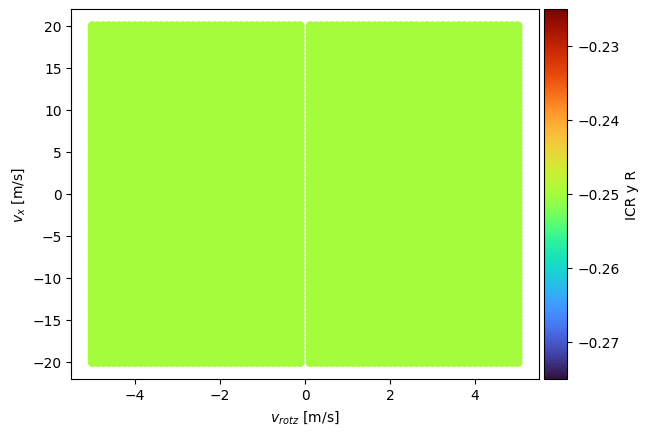

In [14]:
fig, ax = plt.subplots()
sc = ax.scatter(df.vz, df.vx, c=df.ICRyR, cmap="turbo")
ax.set_xlabel(r"${{v}_{rot}}_{z}$ [m/s]")
ax.set_ylabel("$v_x$ [m/s]")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = fig.colorbar(sc, cax=cax, orientation="vertical")
cb.set_label(r"ICR y R")

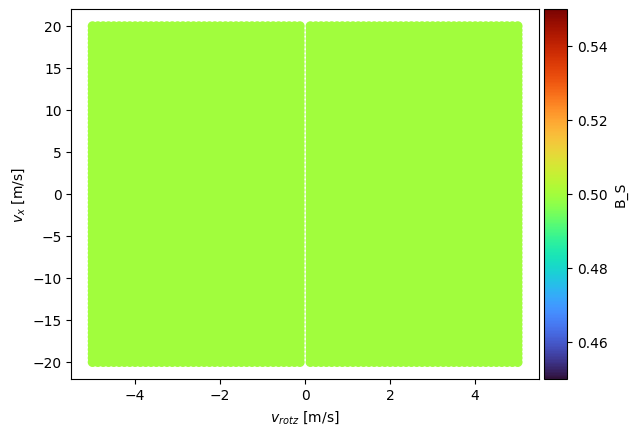

In [15]:
fig, ax = plt.subplots()
sc = ax.scatter(df.vz, df.vx, c=df.Bs, cmap="turbo")
ax.set_xlabel(r"${{v}_{rot}}_{z}$ [m/s]")
ax.set_ylabel("$v_x$ [m/s]")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = fig.colorbar(sc, cax=cax, orientation="vertical")
cb.set_label(r"B_S")

Text(0, 0.5, '$\\rho$')

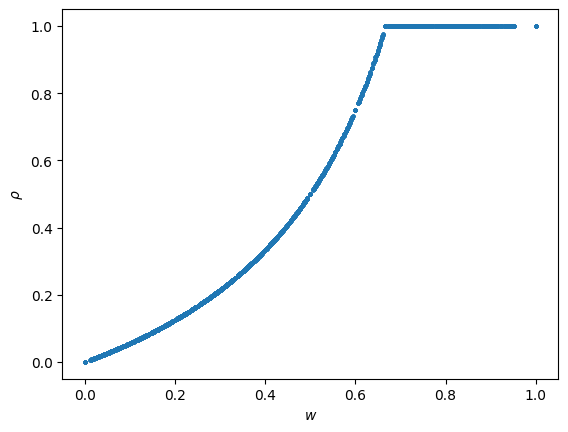

In [16]:
fig, ax = plt.subplots()
ax.plot(df.averho, df.rho, "o", markersize=2)
ax.set_xlabel(r"$w$")
ax.set_ylabel(r"$\rho$")

In [17]:
rapport = df.averho / df.rho
fig, ax = plt.subplots()
ax.plot(df.rho, rapport, "o", markersize=2)
ax.set_xlabel(r"$\rho$")
ax.set_ylabel(r"Ratio")

Text(0, 0.5, 'Ratio')